# 0103 Analyzing real world Data

Real world data pose meany challenge to data analyst and data scientists because it is not so easy to spot correlations and derive insights from them as it is with educational material.

most real world data are also influenced by factors which are not recorded. For example data concerning altitude of a car moving on a path can of course be reocrded but the weather influences the value of altitude reigstered. Usually extending the dataset removes those effects.

The presence of outliers is also very relevant as they might skew some important metrics such as mean or standard deviation.

last one should always check for possible bias sources.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tools
import seaborn as sns

In [2]:
# load data from text file
df_students = pd.read_csv('/home/giacomo_lini/MLOps/Coursera/Azure_ML_Cloud/01_Create_ML_Models_in_Azure/grades.csv',
                          delimiter=',',
                          header='infer')

#drop missing data
df_students = df_students.dropna(axis=0, how='any')

#select passes
passes = pd.Series(df_students['Grade']>= 60)

#add passes column
df_students = pd.concat([df_students, passes.rename('Pass')], axis=1)

df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


tools.show_distribution(data=df_students, )

/home/giacomo_lini/.pyenv/versions/3.10.13/envs/apps/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giacomo_lini/MLOps/Coursera/azure/Azure_ML_Cloud/01_Create_ML_Models_in_Azure/tools.py:114: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


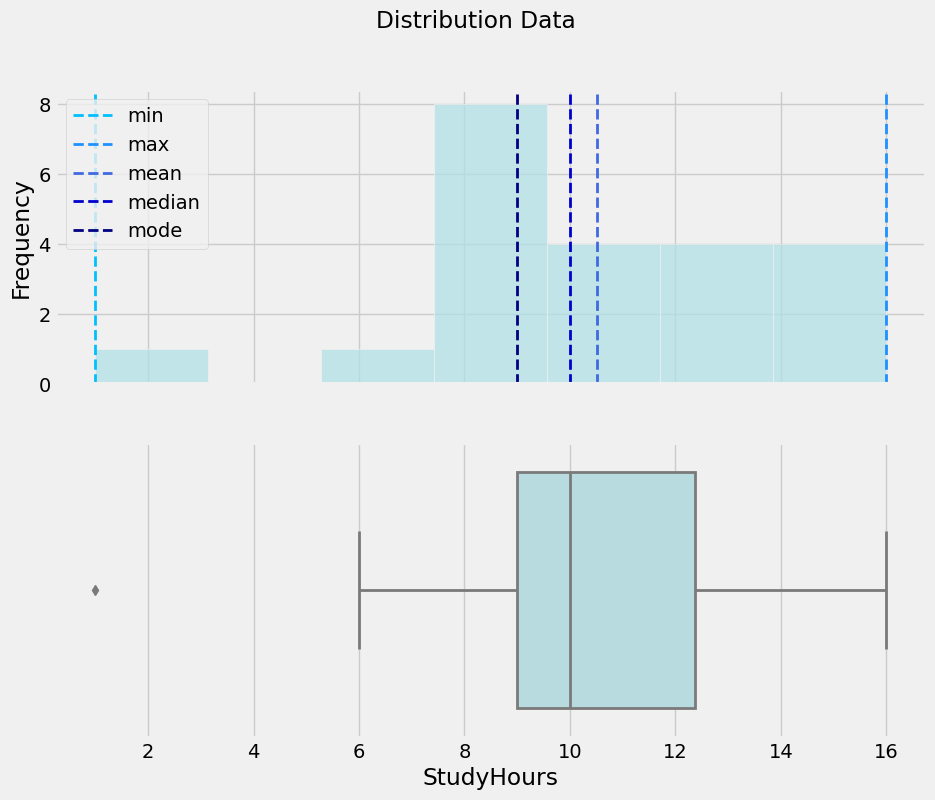

In [3]:
tools.show_distribution(data=df_students, column='StudyHours')

when we call the ```show_distribution``` function on the hours studies we observe that there is a strong deviation from a usual bell shape. In particular there seems to be one student who studied 0 hours. This can be trated as an outlier

/home/giacomo_lini/.pyenv/versions/3.10.13/envs/apps/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giacomo_lini/MLOps/Coursera/azure/Azure_ML_Cloud/01_Create_ML_Models_in_Azure/tools.py:114: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


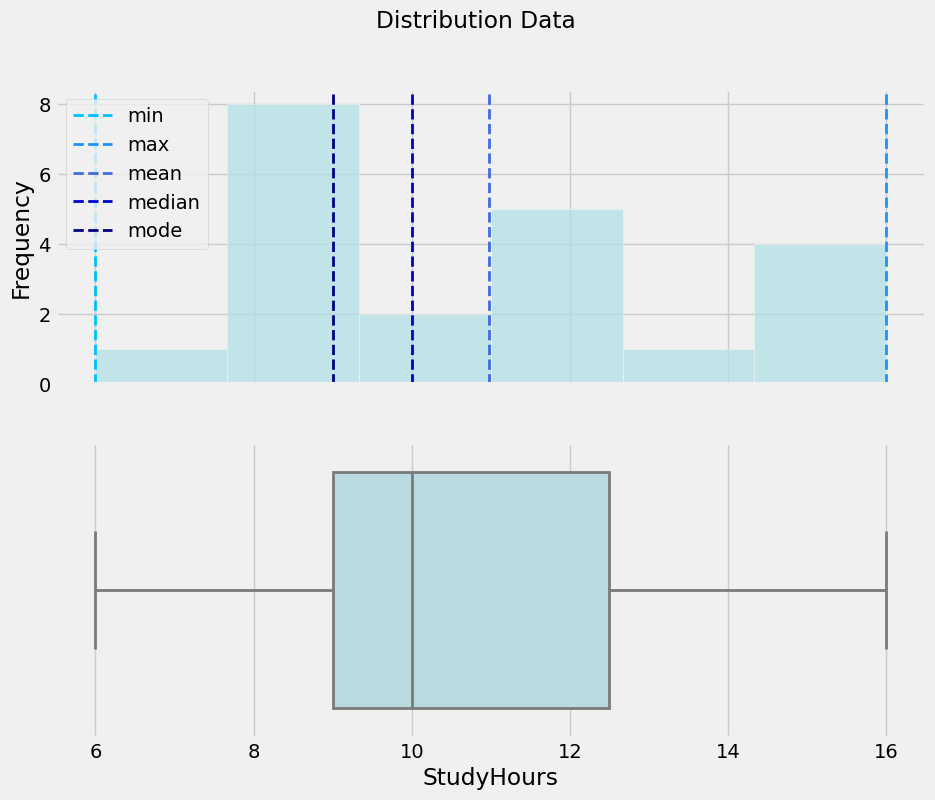

In [4]:
#exclude outlier
tools.show_distribution(df_students.loc[lambda df: df['StudyHours']>1], column='StudyHours')

here we excluded the outlier manually, in general with real world data we exclude values based on percentile

/home/giacomo_lini/.pyenv/versions/3.10.13/envs/apps/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giacomo_lini/MLOps/Coursera/azure/Azure_ML_Cloud/01_Create_ML_Models_in_Azure/tools.py:114: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


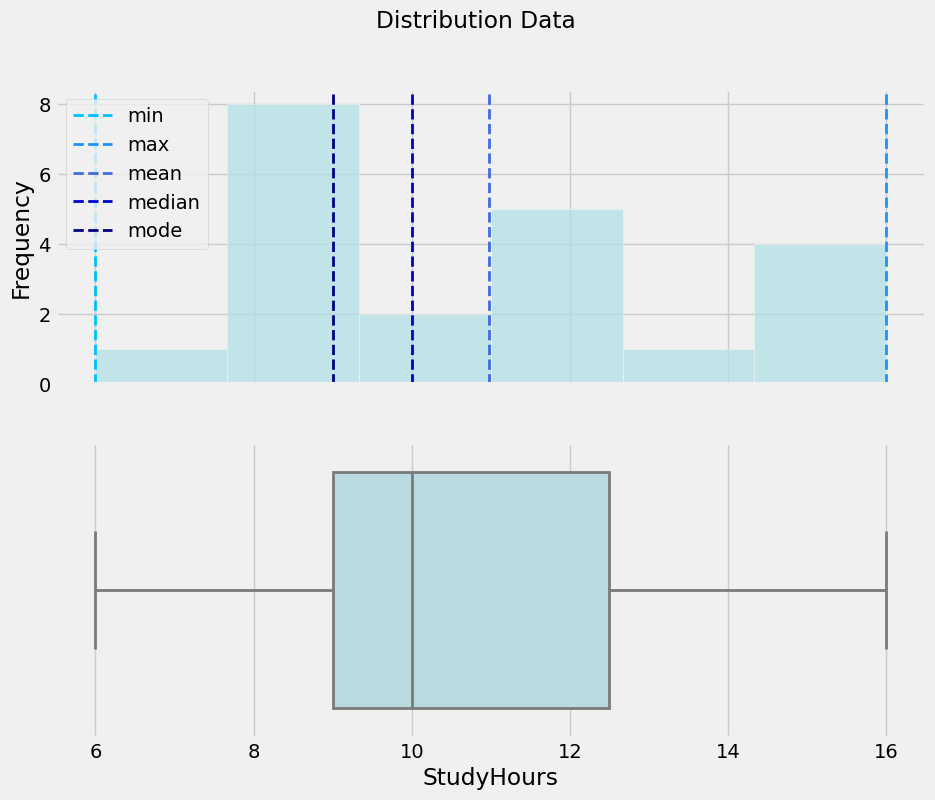

In [5]:
q01 = df_students['StudyHours'].quantile(0.01)

tools.show_distribution(data=df_students.loc[lambda df: df['StudyHours']>q01], column='StudyHours')

Here we obtained the same result excluding the 0.01 percentile. This distribution is non simmetrical as one can see

/home/giacomo_lini/.pyenv/versions/3.10.13/envs/apps/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


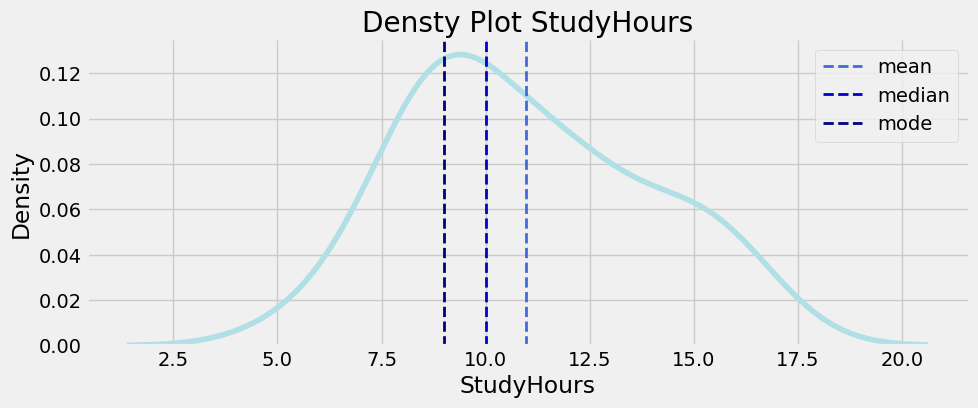

In [6]:
tools.show_density(df_students.loc[lambda df: df['StudyHours']>q01], 'StudyHours' )

The distribution is right skewed, as it has a "long tail" on the right side, meaning that the vast majority of the data  is on the left side of the distribution.

### Measures of variance

What we want to understand now is how variable the data within oour distribution are. There are several indicators to study that:
* range $ r= max - min$
* variance $ \sigma ^2= \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}$
* standard dev $\sigma = \sqrt{\sigma^2}$

In [7]:
# compute variance indicators

for column in ['Grade', 'StudyHours']:
    print(f"""
{column}
-------------------
std_dev = {df_students[column].std()}
variance = {df_students[column].var()}
          """)


Grade
-------------------
std_dev = 21.737911503564376
variance = 472.5367965367965
          

StudyHours
-------------------
std_dev = 3.487143983286775
variance = 12.160173160173159
          


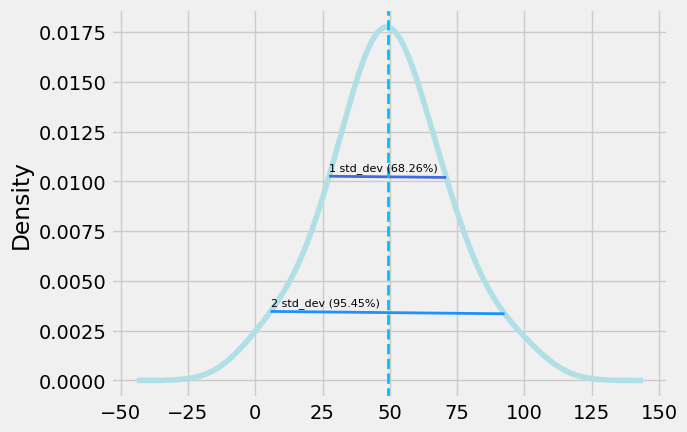

In [8]:
import scipy.stats as stats

column = df_students['Grade']
 
#density function and statistical indicators
density = stats.gaussian_kde(column)

column.plot.density( color= 'powderblue')

sigma = column.std()
mean = column.mean()

x1 = [mean+sigma, mean-sigma]
y1 = density(x1)

plt.plot(x1,
         y1,
         color='royalblue',
         linewidth=2)
plt.annotate('1 std_dev (68.26%)',
             (x1[1], y1[1]+0.0003),
             fontsize=8)

x2 = [mean+(sigma*2), mean-(sigma*2)]
y2 = density(x2)

plt.plot(x2,
         y2, 
         color='dodgerblue',
         linewidth=2)
plt.annotate('2 std_dev (95.45%)',
             (x2[1], y2[1]+0.0003),
             fontsize=8,
)

plt.axvline(x=mean, 
            color='deepskyblue', 
            linestyle='--',
            linewidth=2)

The representation for a normal distribution suggests that

* approximately 68% of the values will fall within one std dev from the mean
* approximately 95% of the values will fall within two std dev from the mean

In [9]:
#this sort of description can be achieved with a built in method

df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


The method works under the assumption that the distribution is normal, meaning that if it is not the numbers are not trustworthy

### Comparing Numerical and Categorical Data

This data contains numerical as well as categorical elements. We can try to compare them in order to understand if there are correlations between variables. For example in the case of StudyHours and Pass

In [10]:
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [11]:
df_students['Pass'] = df_students['Pass'].astype(str)

<Axes: xlabel='StudyHours', ylabel='Pass'>

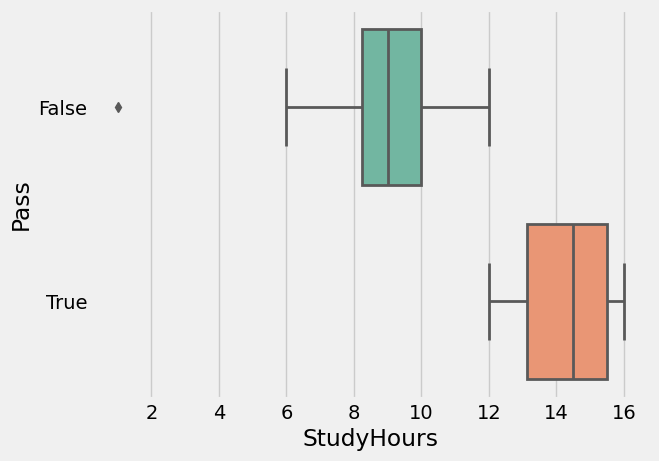

In [12]:
# compare hours studied with final result

sns.boxplot(
    data= df_students,
    x= 'StudyHours',
    y= 'Pass',
    palette='Set2',
    linewidth=2
)

### Comparing Numerical data

a similar comparison can of course be done in the case of numerical data. with some adjustements of course

<Axes: xlabel='StudyHours', ylabel='Grade'>

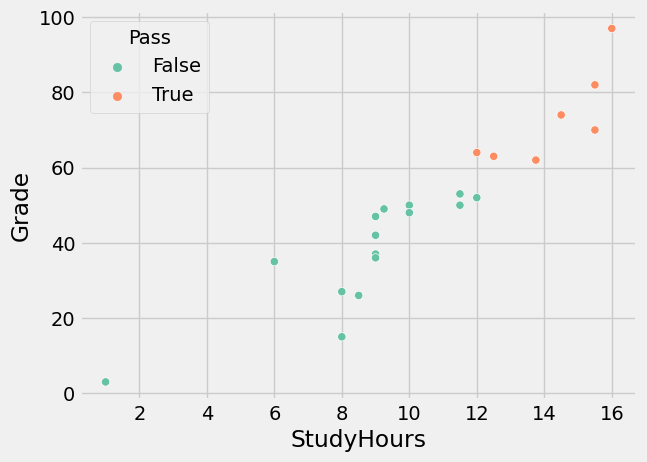

In [13]:
#compare study hours with grade

sns.scatterplot(
    data=df_students,
    x = 'StudyHours',
    y = 'Grade',
    hue='Pass',
    palette='Set2'
)

there seems to be a linear relationship between the number of hours spent studying and the result of the test. This of course does not necessarily means that one i the cause of the other (correlation $\ne$ causation), but nevertheless we can investigate this correlation. we build then a linear regression


slope: 5.769
intercept: -11.522
-----------------
function: y = 5.769*x + -11.522



/home/giacomo_lini/.pyenv/versions/3.10.13/envs/apps/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/giacomo_lini/.pyenv/versions/3.10.13/envs/apps/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Grade vs Study Hours (Actual and Prediciton Line)')

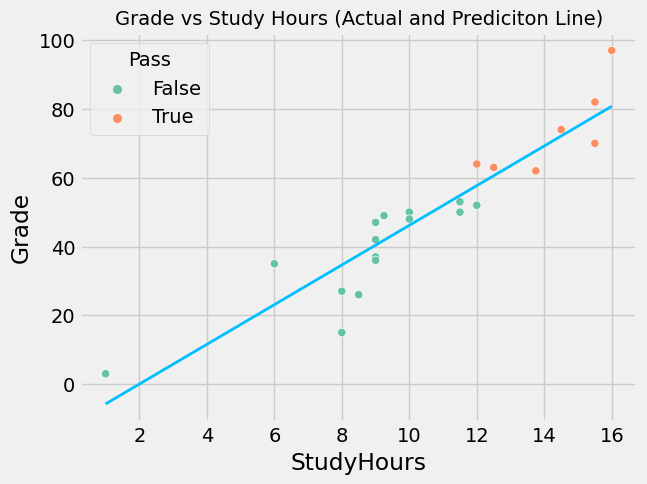

In [25]:
from scipy import stats

df_regression = df_students[['Grade', 'StudyHours']].copy()

m,b,r,p,se = stats.linregress(
    df_regression['StudyHours'],
    df_regression['Grade']
)

print(f"""
slope: {round(m,3)}
intercept: {round(b,3)}
-----------------
function: y = {round(m,3)}*x + {round(b,3)}
""")

# compute predictions for students

df_regression['f(x)'] = round(m * df_regression['StudyHours'] + b, 3)


sns.scatterplot(
    data=df_students,
    x = 'StudyHours',
    y = 'Grade',
    hue='Pass',
    palette='Set2'
)
sns.lineplot(
    data= df_regression,
    x = 'StudyHours',
    y= 'f(x)',
    color='deepskyblue',
    linewidth=2
)
plt.legend(title='Pass')
plt.title('Grade vs Study Hours (Actual and Prediciton Line)', fontsize=14)


In [26]:
??stats.linregress

Signature: stats.linregress(x, y=None, alternative='two-sided')
Source:   
def linregress(x, y=None, alternative='two-sided'):
    """
    Calculate a linear least-squares regression for two sets of measurements.

    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:

        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression li